In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
from iminuit import Minuit
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
from ExternalFunctions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

MA1 = read_csv_BC(f'{path_S1}MA200/', parent_path, -1)
MA2 = read_csv_BC(f'{path_S2}MA200/', parent_path, -1)
MA1['MA200-0369_241217094901'] = pd.concat([MA1['MA200-0369_241217094901'], MA1['MA200-0369_241217101259']], ignore_index=True)

MA = merge_dicts(MA1, MA2)

timestamps_MA = [['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
                 ['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
                 ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
                 ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
                 ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
                 ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
                 ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
                 ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
                 ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
                 ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
                 ['2024-12-17 09:15:00', '2024-12-17 15:45:00'],
                 ['2024-12-17 09:15:00', '2024-12-17 15:45:00']]


dict_keys = ['MA200-0369_241210105000', 'MA200-0285_241210105200', 'MA200-0369_241211095501', 'MA200-0285_241211093400',
             'MA200-0369_241212094705', 'MA200-0285_241212093100', 'MA200-0369_241213094000', 'MA200-0285_241213092900',
             'MA200-0369_241216103300', 'MA200-0285_241216102104', 'MA200-0369_241217094901', 'MA200-0285_241217101400']

2024-12-10 09:15:00
UV and IR
<ValueView p=366.6418771967341 mu=1.3329980139192614 sigma=0.34539556286132506>
<ErrorView p=19.917790290384946 mu=0.018333487906863864 sigma=0.013465861704191019>
2024-12-10 09:15:00
UV and IR
<ValueView p=135.78218986851925 mu=1.2782970635821755 sigma=0.6144633564444217>
<ErrorView p=11.695563879254752 mu=0.05425808935311265 sigma=0.0421229335971911>
2024-12-11 09:00:00
UV and IR
<ValueView p=423.5629274957347 mu=1.1491180263602667 sigma=0.14247434614908192>
<ErrorView p=20.66007679641166 mu=0.007136712257718748 sigma=0.0054230844211848525>
2024-12-11 09:00:00
UV and IR
<ValueView p=308.6201296996415 mu=1.2889624948241027 sigma=0.8481907578143584>
<ErrorView p=17.62469540127147 mu=0.04959061065635633 sigma=0.03725092721820477>
2024-12-10 09:15:00
Blue and IR
<ValueView p=365.89381000664775 mu=1.1437438533504536 sigma=0.42162169652164083>
<ErrorView p=18.46695630952687 mu=0.022863624600070714 sigma=0.01671916640796821>
2024-12-10 09:15:00
Blue and IR
<Val

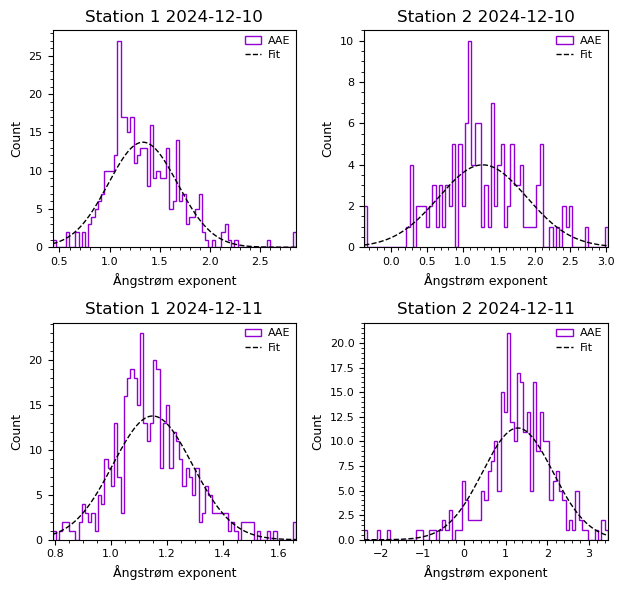

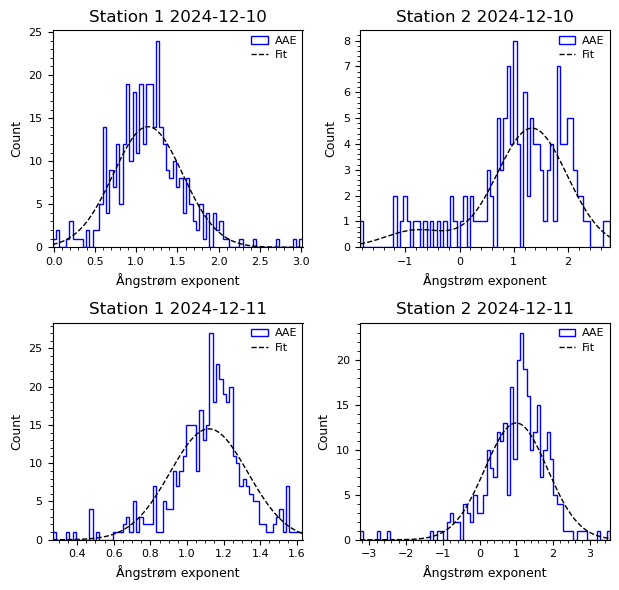

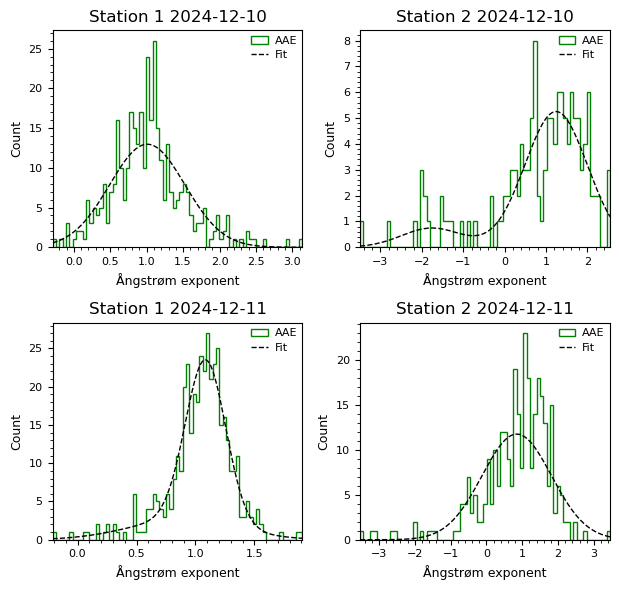

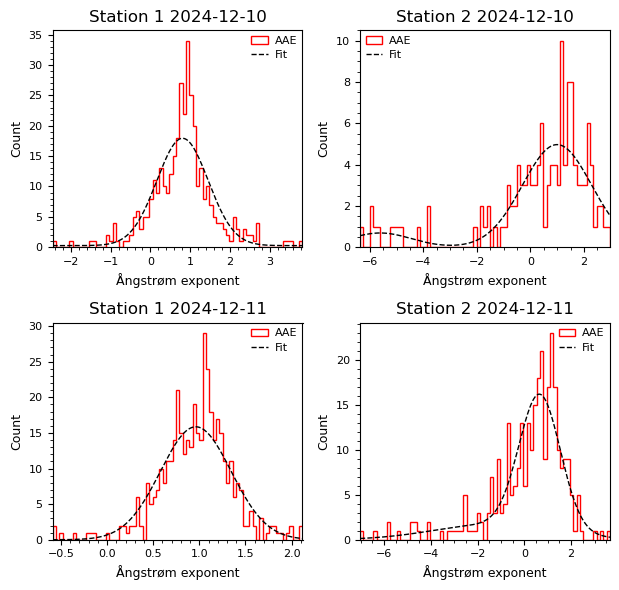

In [11]:
# UV
initial1 = [{'p': 350, 'mu': 2, 'sigma': 0.5},
            {'p': 250, 'mu': 2, 'sigma': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5}]
# Blue
initial2 = [{'p': 350, 'mu': 2, 'sigma': 0.5},
            {'p1': 250, 'mu1': 1.5, 'sigma1': 0.5, 'p2': 250, 'mu2': -0.5, 'sigma2': 0.5},
            {'p': 400, 'mu': 1, 'sigma': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5}]
# Green
initial3 = [{'p': 350, 'mu': 2, 'sigma': 0.5},
            {'p1': 250, 'mu1': 2, 'sigma1': 0.5, 'p2': 250, 'mu2': 2, 'sigma2': 0.5},
            {'p1': 400, 'mu1': 1.1, 'sigma1': 0.5, 'p2': 400, 'mu2': 0.6, 'sigma2': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5}]
# Red
initial4 = [{'p1': 350, 'mu1': 2, 'sigma1': 0.5, 'p2': 350, 'mu2': 2, 'sigma2': 0.5},
            {'p1': 250, 'mu1': 1, 'sigma1': 0.5, 'p2': 250, 'mu2': 1, 'sigma2': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5},
            {'p1': 400, 'mu1': 2, 'sigma1': 0.5, 'p2': 400, 'mu2': 2, 'sigma2': 0.5}]
initial_list = [initial1, initial2, initial3, initial4]

fit_functions = [[gauss, gauss, gauss, gauss],          # UV
                 [gauss, d_gauss, gauss, gauss],        # Blue
                 [gauss, d_gauss, d_gauss, gauss],      # Green
                 [d_gauss, d_gauss, gauss, d_gauss]]    # Red

figs, axes, AAE1_d2 = AAE_hist(2, 2, (6.3, 6), MA, dict_keys[:4], timestamps_MA[:4], 75, fit_functions, initial_list)

names = ['UV-IR', 'Blue-IR', 'Green-IR', 'Red-IR']
for i, axs in enumerate(axes):
    for j, times in enumerate([timestamps_MA[0], timestamps_MA[2]]):
        date = times[0].split(' ')[0]
        axs[j][0].set_title(f'Station 1 {date}')
        axs[j][1].set_title(f'Station 2 {date}')
    figs[i].tight_layout()
    figs[i].savefig(f'Gaussian_fits/AAE_CPH-Hall_{names[i]}.png', dpi = 600)

2024-12-12 09:00:00
UV and IR
<ValueView p1=107.09201796096406 mu1=1.3934081840233425 sigma1=0.3333236788516356 p2=315.6286422564653 mu2=1.1835934219954816 sigma2=0.12551558286916922>
<ErrorView p1=25.661754834600107 mu1=0.05489977147643716 sigma1=0.04139515243879043 p2=29.96715768059761 mu2=0.010132196636347124 sigma2=0.00955021170584703>
2024-12-12 09:00:00
UV and IR
<ValueView p1=208.74606518534068 mu1=0.9916231442457525 sigma1=0.38843758174002985 p2=196.04060426032947 mu2=1.0832183922981498 sigma2=0.09494343854051975>
<ErrorView p1=24.210610524468393 mu1=0.022918209596406603 sigma1=0.025310123728727114 p2=23.486968347125273 mu2=0.009250367616456805 sigma2=0.011316252771027926>
2024-12-13 08:45:00
UV and IR
<ValueView p=314.3396484555174 mu=1.0947912384057137 sigma=0.07028337079844496>
<ErrorView p=17.73988188095128 mu=0.003989421841770428 sigma=0.0028926123233494233>
2024-12-13 08:45:00
UV and IR
<ValueView p=299.1674980458661 mu=0.8971363417072811 sigma=0.6722095919511862>
<ErrorV

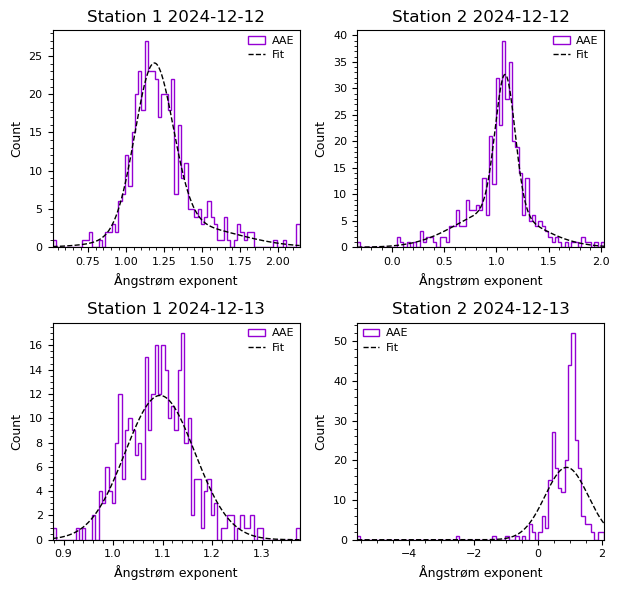

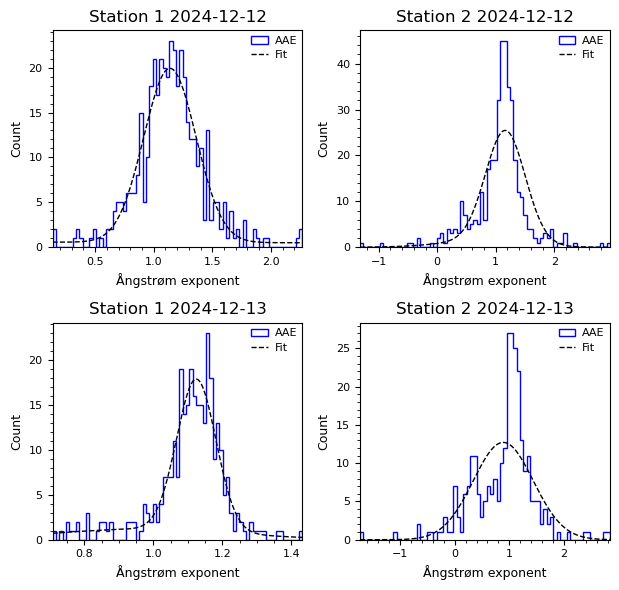

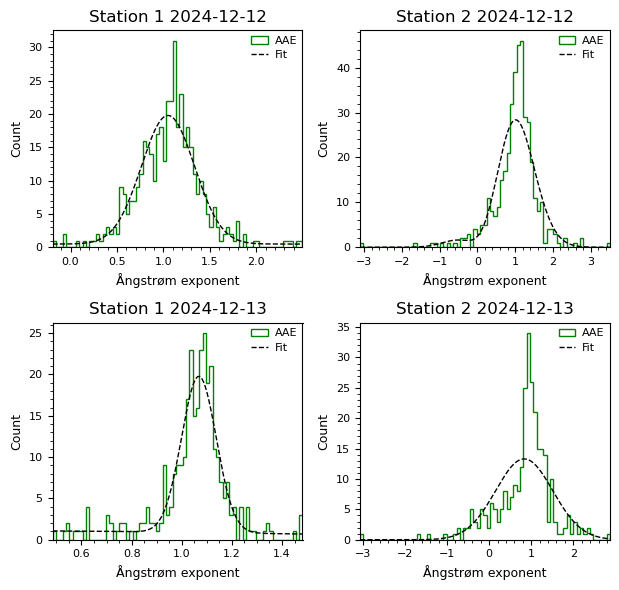

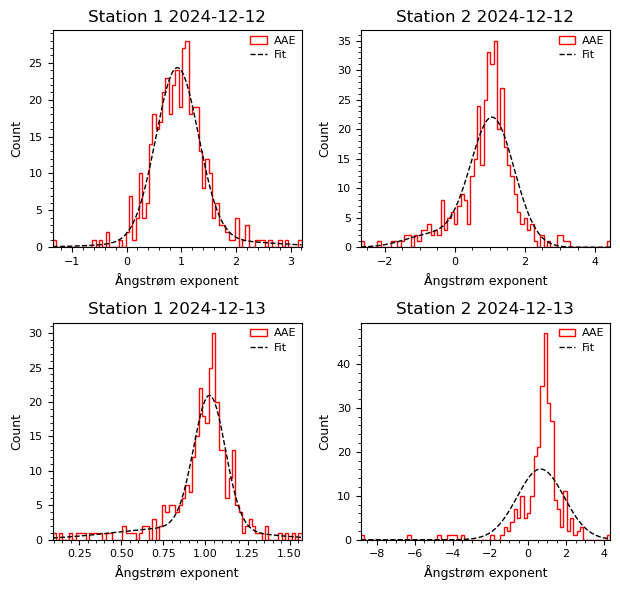

In [22]:
# UV
initial1 = [{'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
            {'p1': 400,  'mu1': 1.1, 'sigma1': 0.5, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.03},
            {'p': 300,  'mu': 1.1, 'sigma': 0.3},
            {'p': 400,  'mu': 1, 'sigma': 0.01}]
# Blue
initial2 = [{'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
            {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
            {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
            {'p': 400,  'mu': 1, 'sigma': 0.05}]
# Green
initial3 = [{'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
            {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
            {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
            {'p': 400,  'mu': 1, 'sigma': 0.05}]
# Red
initial4 = [{'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
            {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
            {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
            {'p': 400,  'mu': 1, 'sigma': 0.05}]
initial_list = [initial1, initial2, initial3, initial4]

fit_functions = [[d_gauss, d_gauss, gauss, gauss],      # UV
                 [d_gauss, d_gauss, d_gauss, gauss],    # Blue
                 [d_gauss, d_gauss, d_gauss, gauss],    # Green
                 [d_gauss, d_gauss, d_gauss, gauss]]    # Red

figs, axes, AAE1_d2 = AAE_hist(2, 2, (6.3, 6), MA, dict_keys[4:8], timestamps_MA[4:8], 75, fit_functions, initial_list)

names = ['UV-IR', 'Blue-IR', 'Green-IR', 'Red-IR']
for i, axs in enumerate(axes):
    for j, times in enumerate([timestamps_MA[4], timestamps_MA[6]]):
        date = times[0].split(' ')[0]
        axs[j][0].set_title(f'Station 1 {date}')
        axs[j][1].set_title(f'Station 2 {date}')
    figs[i].tight_layout()
    figs[i].savefig(f'Gaussian_fits/AAE_CPH-Platform_{names[i]}.png', dpi = 600)

2024-12-10
<ValueView p=366.6418771967341 mu=1.3329980139192614 sigma=0.34539556286132506>
<ValueView p=135.8211651590698 mu=1.2779451972867935 sigma=0.615029171060908>
2024-12-11
<ValueView p=423.61103700683805 mu=1.1491349087212668 sigma=0.14246321047746852>
<ValueView p=308.6201296996415 mu=1.2889624948241027 sigma=0.8481907578143584>
2024-12-12
<ValueView p1=107.09201796096406 mu1=1.3934081840233425 sigma1=0.3333236788516356 p2=315.6286422564653 mu2=1.1835934219954816 sigma2=0.12551558286916922>
<ValueView p1=208.7882593310412 mu1=0.9916396628554963 sigma1=0.3883988299750108 p2=196.11723130853824 mu2=1.0832105695280008 sigma2=0.09492609380356852>
2024-12-13
<ValueView p1=261.03443893224306 mu1=1.0863388347029979 sigma1=0.05738004868783493 p2=54.44091054325002 mu2=1.1394703336059588 sigma2=0.11191856311678627>
<ValueView p=299.1673666069181 mu=0.896935867178965 sigma=0.6721916487843981>
2024-12-16
<ValueView p1=235.86413512341304 mu1=1.0240414262895707 sigma1=0.04810527261730017 p2=

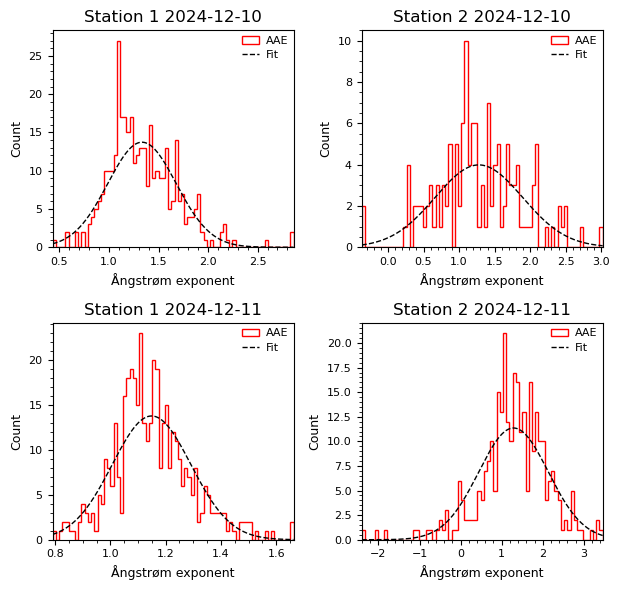

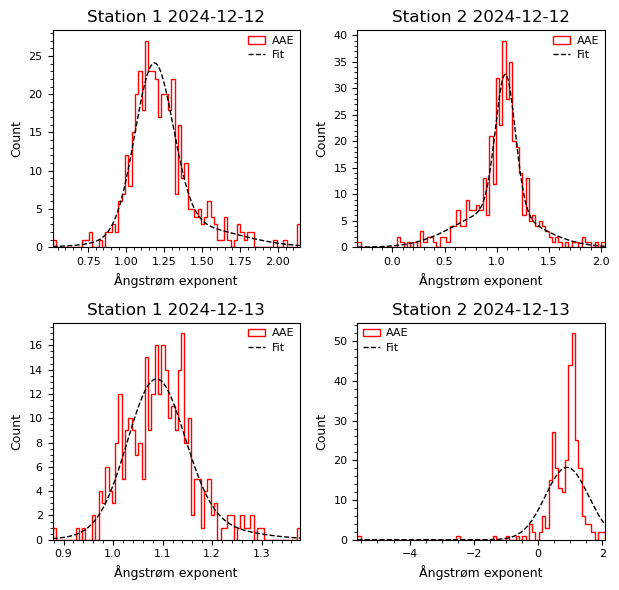

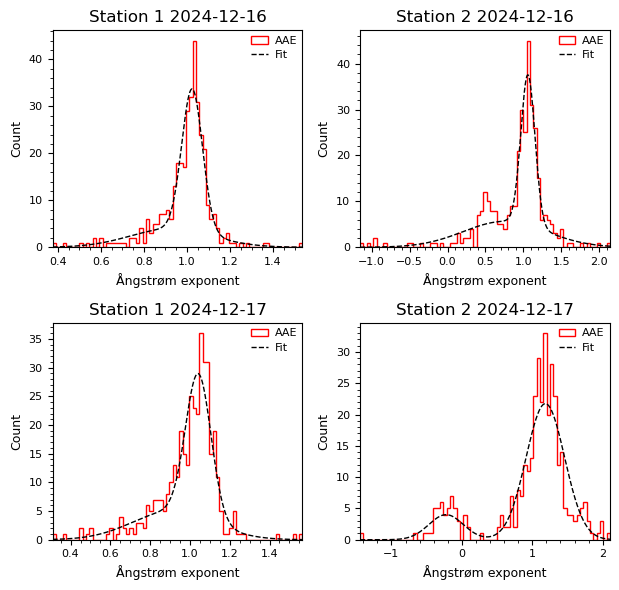

In [7]:
Nbins = 75

fig1, ax1 = plt.subplots(2, 2, figsize = (6.3, 6))
fig2, ax2 = plt.subplots(2, 2, figsize = (6.3, 6))
fig3, ax3 = plt.subplots(2, 2, figsize = (6.3, 6))

initial1 = [{'p': 350, 'mu': 2, 'sigma': 0.5},
            {'p': 250, 'mu': 2, 'sigma': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5},
            {'p': 400, 'mu': 2, 'sigma': 0.5}]
initial2 = [{'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
            {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
            {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
            {'p': 400,  'mu': 1, 'sigma': 0.05}]
initial3 = [{'p1': 300, 'mu1': 1, 'sigma1': 0.1, 'p2': 100, 'mu2': 0.5,'sigma2': 0.1},
            {'p1': 300, 'mu1': 1.1, 'sigma1': 0.1, 'p2': 100, 'mu2': 0.5,'sigma2': 0.1},
            {'p1': 300, 'mu1': 1, 'sigma1': 0.5, 'p2': 100, 'mu2': 0.1,'sigma2': 0.5},
            {'p1': 500, 'mu1': 1.5, 'sigma1': 0.1, 'p2': 100, 'mu2': -0.3,'sigma2': 0.1}]
func2 = [d_gauss, gauss]

for i, key in enumerate(MA1_dict_keys[1:]):
    date = timestamps_MA[i][0].split(' ')[0]
    print(date)

    if i < 2:

        AAE_hist(ax1[i][0], MA1[key], timestamps_MA[i], Nbins, gauss, initial1[i])
        AAE_hist(ax1[i][1], MA2[MA2_dict_keys[i+1]], timestamps_MA[i], Nbins, gauss, initial1[i+2])

        ax1[i][0].set_title('Station 1 ' + date)
        ax1[i][1].set_title('Station 2 ' + date)

        fig1.tight_layout()
        fig1.savefig('Gaussian_fits/AAE_CPH_hall.png', dpi = 600)

    if 1 < i < 4:

        AAE_hist(ax2[i-2][0], MA1[key], timestamps_MA[i], Nbins, func2[0], initial2[i-2])
        AAE_hist(ax2[i-2][1], MA2[MA2_dict_keys[i+1]], timestamps_MA[i], Nbins, func2[i-2], initial2[i])

        ax2[i-2][0].set_title('Station 1 ' + date)
        ax2[i-2][1].set_title('Station 2 ' + date)

        fig2.tight_layout()
        fig2.savefig('Gaussian_fits/AAE_CPH_platform.png', dpi = 600)

    if i > 3:
                         
        AAE_hist(ax3[i-4][0], MA1[key], timestamps_MA[i], Nbins, d_gauss, initial3[i-4])
        AAE_hist(ax3[i-4][1], MA2[MA2_dict_keys[i+1]], timestamps_MA[i], Nbins, d_gauss, initial3[i-2])

        ax3[i-4][0].set_title('Station 1 ' + date)
        ax3[i-4][1].set_title('Station 2 ' + date)

        fig3.tight_layout()
        fig3.savefig('Gaussian_fits/AAE_NP.png', dpi = 600)